In [1]:
# Imports
import torch
import jovian
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

## Data loading

In [2]:
df_train = pd.read_csv('dataset_train.csv')
df_test = pd.read_csv('dataset_test.csv')

In [3]:
df_train.head()

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

In [5]:
df_test.head()

Index  Hogwarts House First Name    Last Name    Birthday Best Hand  \
0      0             NaN       Rico      Sargent  2001-10-06     Right   
1      1             NaN     Tamara  Shackelford  1998-01-08      Left   
2      2             NaN      Staci     Crandall  1998-09-15      Left   
3      3             NaN        Dee        Gavin  2001-05-10     Right   
4      4             NaN    Gregory    Gustafson  1999-02-01     Right   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     41642.0  696.096071   3.020172                      -6.960961   
1     45352.0 -370.844655   2.965226                       3.708447   
2     43502.0  320.303990  -6.185697                      -3.203040   
3     61831.0  407.202928   4.962442                            NaN   
4         NaN  288.337747   3.737656                      -2.883377   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       7.996     -365.151850     393.138185          4.207691   
1       6.349      522.580486     602.853051          6.460017   
2       4.619     -630.073207     588.071795         -5.565818   
3         NaN     -449.179806     427.699966               NaN   
4       4.886     -449.732166     385.712782          2.876347   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1046.742736  3.668983                   0.373853 -244.48172  -13.62  
1      1048.053878  8.514622                   0.577432 -231.29200  -26.26  
2       936.437358  1.850829                  -1.647150 -252.99343  200.15  
3      1043.397718  4.656573                   1.164708 -244.01660  -11.15  
4      1051.377936  2.750586                   0.102104 -243.99806   -7.12

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          400 non-null    int64  
 1   Hogwarts House                 0 non-null      float64
 2   First Name                     400 non-null    object 
 3   Last Name                      400 non-null    object 
 4   Birthday                       400 non-null    object 
 5   Best Hand                      400 non-null    object 
 6   Arithmancy                     387 non-null    float64
 7   Astronomy                      387 non-null    float64
 8   Herbology                      389 non-null    float64
 9   Defense Against the Dark Arts  392 non-null    float64
 10  Divination                     394 non-null    float64
 11  Muggle Studies                 390 non-null    float64
 12  Ancient Runes                  392 non-null    flo

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

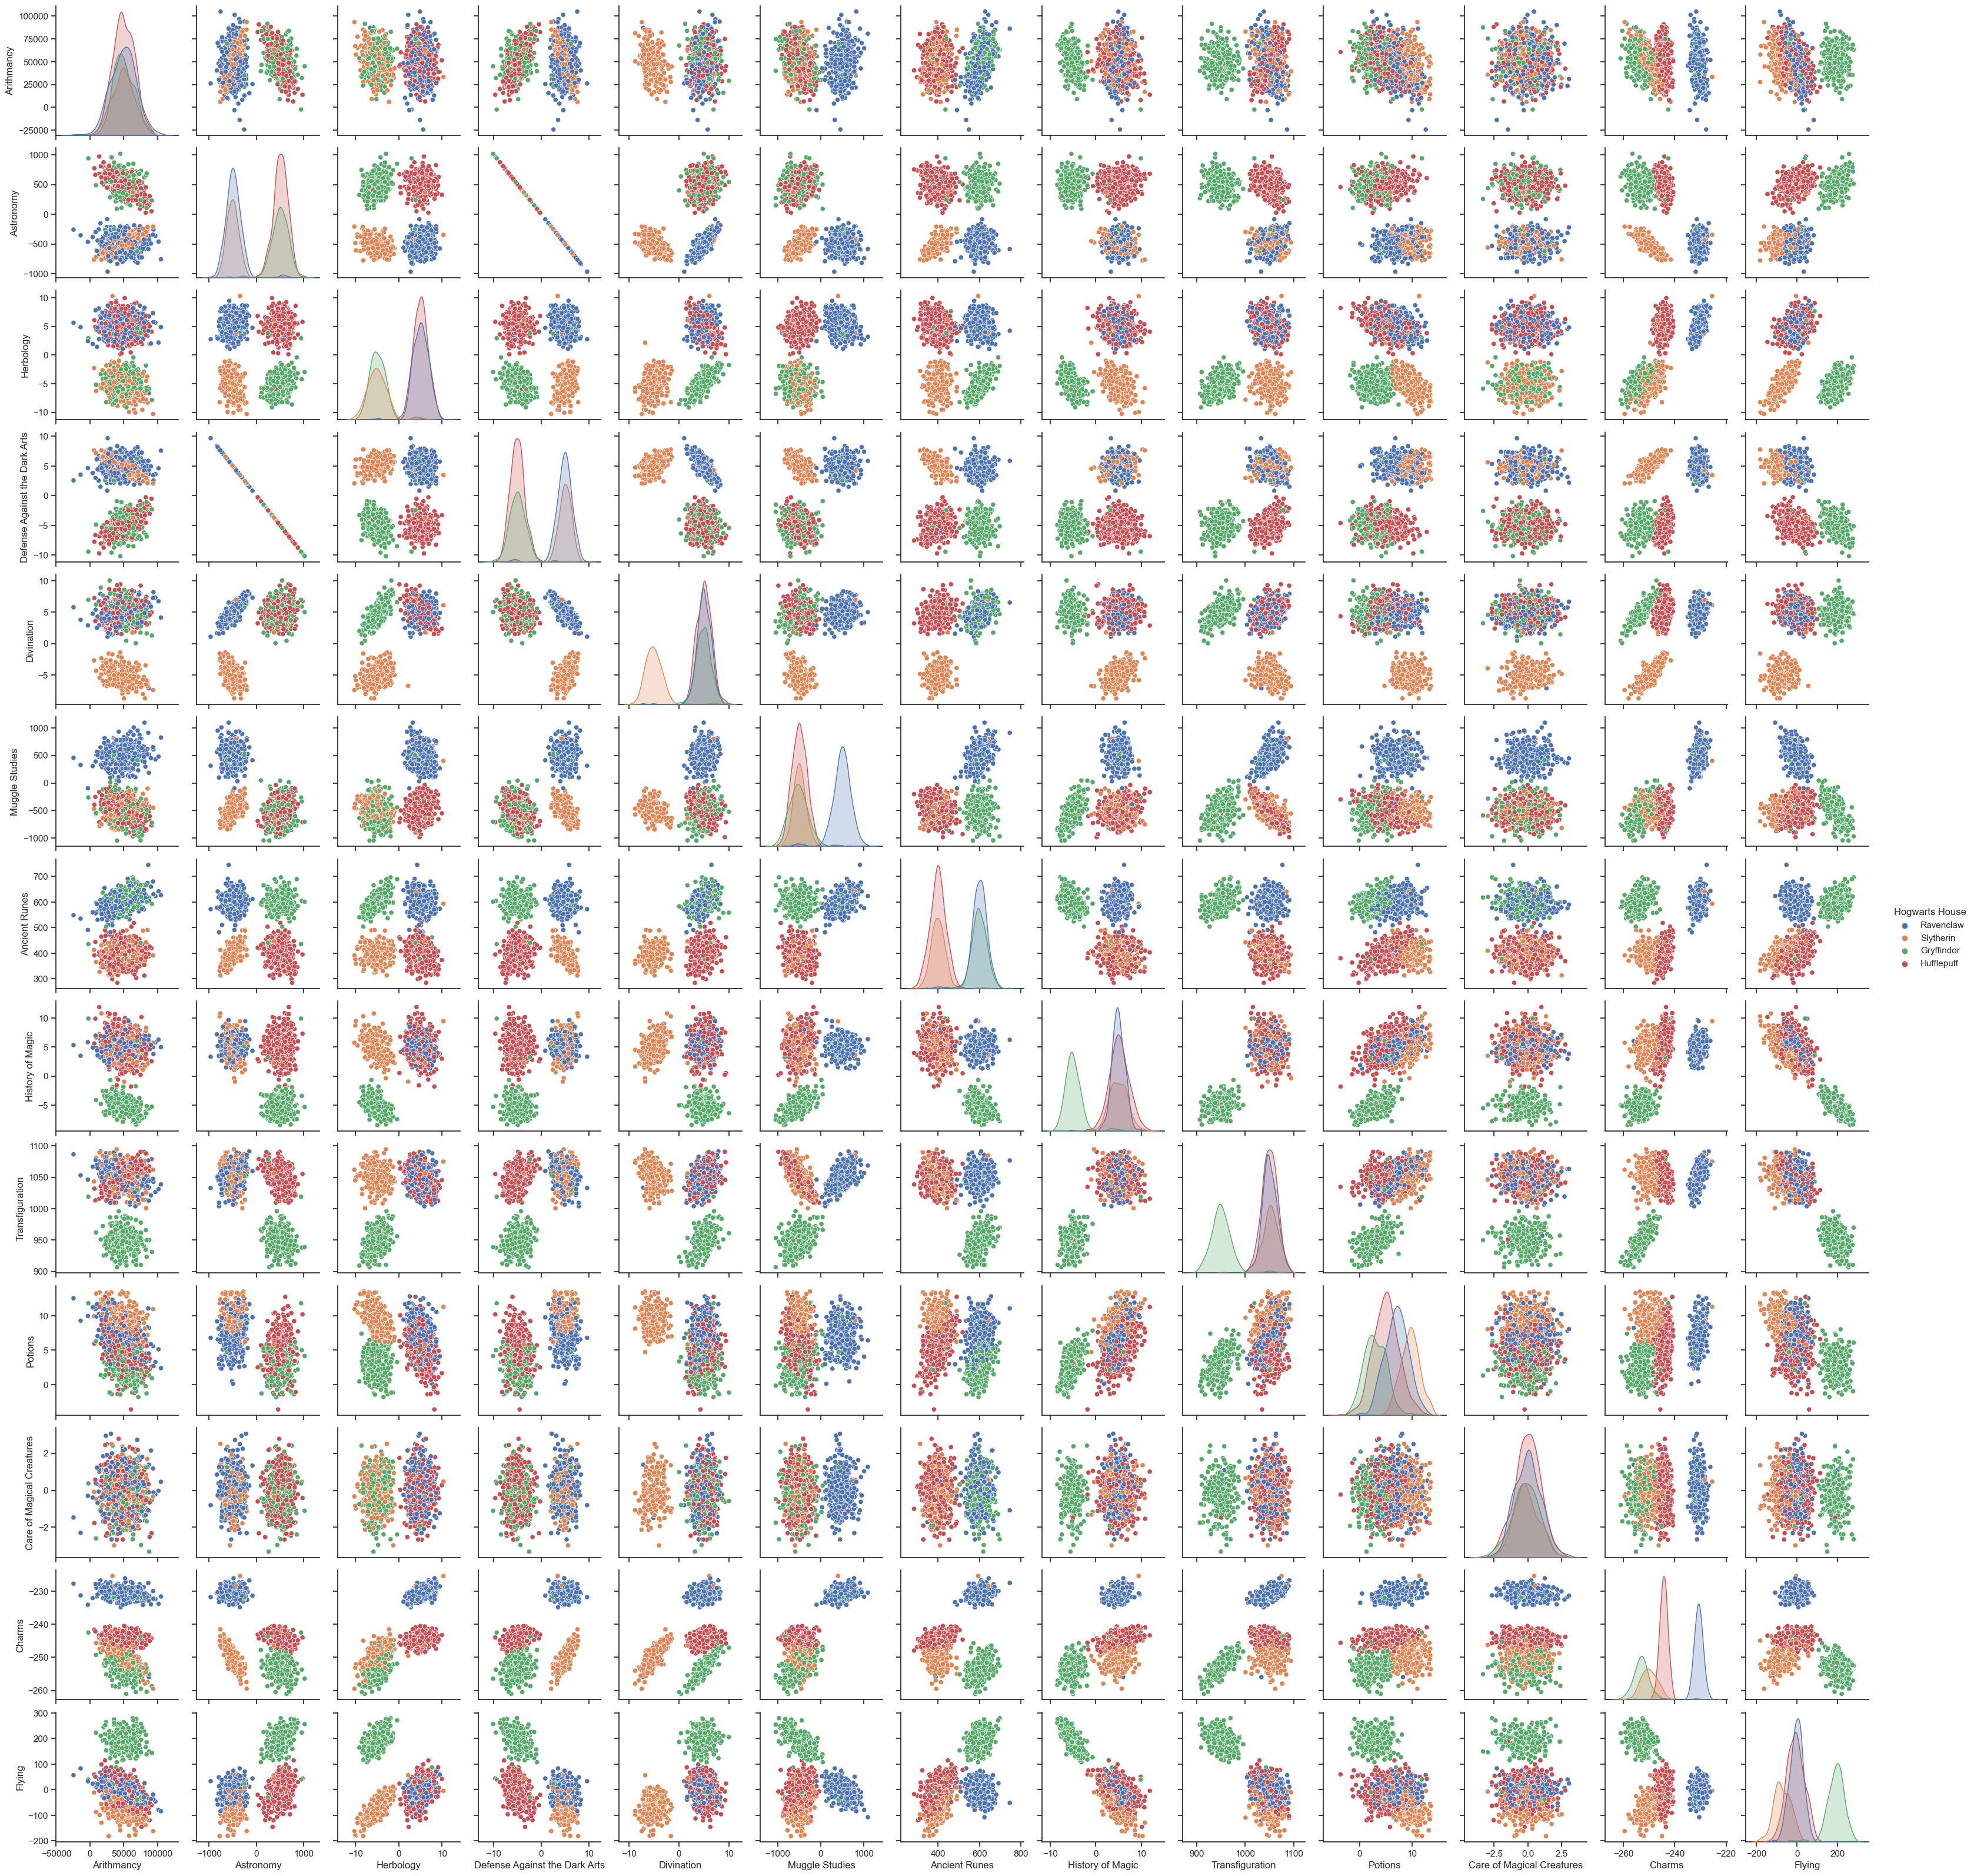

In [8]:
sns.set(style="ticks", color_codes=True)

df_viz = df_train.dropna()
# dropping the index because it does not make any sense to do a scatter pair plot on
df_viz = df_viz.drop("Index", axis=1)
g = sns.pairplot(df_viz, hue="Hogwarts House")
g.savefig('pairplot.png')

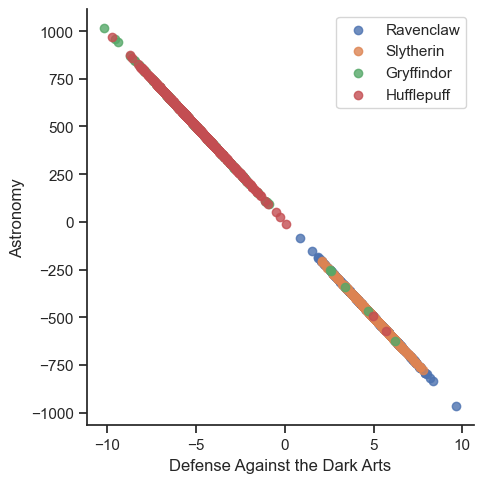

In [9]:
sns.lmplot(x="Defense Against the Dark Arts", 
           y="Astronomy", 
           data=df_train, 
           fit_reg=False, 
           hue='Hogwarts House', 
           legend=False)

plt.legend(loc='upper right')

In [10]:
df_train['Astronomy'], df_train['Defense Against the Dark Arts']

(0      -487.886086
 1      -552.060507
 2      -366.076117
 3       697.742809
 4       436.775204
            ...    
 1595    354.280086
 1596    367.531174
 1597    544.018925
 1598    453.676219
 1599    688.911989
 Name: Astronomy, Length: 1600, dtype: float64,
 0       4.878861
 1       5.520605
 2       3.660761
 3      -6.977428
 4            NaN
           ...   
 1595   -3.542801
 1596   -3.675312
 1597   -5.440189
 1598   -4.536762
 1599   -6.889120
 Name: Defense Against the Dark Arts, Length: 1600, dtype: float64)

In [11]:
df_train['Astronomy'] / df_train['Defense Against the Dark Arts']

0      -100.0
1      -100.0
2      -100.0
3      -100.0
4         NaN
        ...  
1595   -100.0
1596   -100.0
1597   -100.0
1598   -100.0
1599   -100.0
Length: 1600, dtype: float64

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def standartize(df, names):
    tmp = df.copy()
    df = tmp[names]
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    # Fit your data on the scaler object
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=names)
    return scaled_df, scaler

def preprocess_df(df):
    df = df.copy()
    # drop useless columns
    df = df.drop(columns=['Index', 'First Name', 'Last Name', 'Astronomy'])
    # fill missing values in features with mean
    df = df.fillna(df.mean())        
    # preprocess columns
    # convert categorical features to numerical
    df['Best Hand'] = df['Best Hand'].astype('category')
    df['Hogwarts House'] = df['Hogwarts House'].astype('category')
    # store mapping for later usage
    map_dict = dict(enumerate(df['Best Hand'].cat.categories)), dict(enumerate(df['Hogwarts House'].cat.categories))
    df['Best Hand'] = df['Best Hand'].cat.codes
    df['Hogwarts House'] = df['Hogwarts House'].cat.codes
    # convert string date to datetime
    df['Birthday'] = pd.to_datetime(df['Birthday'])
    # separate datetime into day, month, year features
    df['Birth_day'] = df['Birthday'].dt.day
    df['Birth_month'] = df['Birthday'].dt.month
    df['Birth_year'] = df['Birthday'].dt.year
    df = df.drop(columns=['Birthday'])
    
    X = df.drop(columns=['Hogwarts House'])
    y = df['Hogwarts House']
    
    # get train and val split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  
    transformed_features = list(set(X_train.columns) - set(['Best Hand']))
    
    train_indxs = X_train.index
    test_indxs = X_test.index
    
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # standartize train
    X_train_scaled, scaler = standartize(X_train, transformed_features)
    X_train_scaled['Best Hand'] = X_train['Best Hand']
    
    # standartize test
    X_test_scaled = scaler.fit_transform(X_test[transformed_features])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=transformed_features)
    X_test_scaled['Best Hand'] = X_test['Best Hand']
    
    preprocessing_params = {'map_dict': map_dict,
                            'scaler': scaler,
                            'train_indxs':train_indxs,
                            'test_indxs':test_indxs}
    
    return X_train_scaled, X_test_scaled, y_train, y_test, preprocessing_params

In [13]:
X_train, X_test, y_train, y_test, processing_params = preprocess_df(df_train)

C:\Users\subha\AppData\Local\Temp\ipykernel_4204\1528482271.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [14]:
X_train.head()

Herbology  Birth_month    Flying  Muggle Studies  Transfiguration  \
0   0.370353     1.618190  0.158227       -0.077914        -0.231908   
1   0.484086    -0.735541 -0.177934        1.127152         0.141480   
2  -1.026683    -0.735541  2.064874       -0.968363        -1.875075   
3  -1.503661    -0.147108 -1.559613       -0.849689         0.974693   
4   0.800832    -0.441325 -0.284332        1.796741         0.628948   

    Potions  History of Magic  Ancient Runes    Charms  Arithmancy  \
0  1.848475          1.574189      -0.589052  0.113604   -3.084841   
1  0.586672          0.577970       0.928244  1.274715   -0.315718   
2 -1.043780         -1.924841       0.941062 -0.797002   -1.170422   
3  1.716450          0.997044      -1.525900 -0.691669    0.023633   
4 -0.029892          0.326786       0.392511  1.467603   -1.370539   

   Divination  Birth_day  Birth_year  Care of Magical Creatures  \
0    0.929596  -1.437774   -1.254100                   0.437238   
1    0.216637  -1.437774   -0.561470                   0.463269   
2    0.834743  -0.980620    0.823791                  -0.641019   
3   -2.092976   0.619418   -0.561470                  -0.648676   
4    0.155162   0.390841    0.823791                   1.267019   

   Defense Against the Dark Arts  Best Hand  
0                      -1.736339          0  
1                       1.181918          1  
2                      -0.800945          1  
3                       1.332821          1  
4                       1.167184          1

In [15]:
processing_params

{'map_dict': ({0: 'Left', 1: 'Right'},
  {0: 'Gryffindor', 1: 'Hufflepuff', 2: 'Ravenclaw', 3: 'Slytherin'}),
 'scaler': StandardScaler(),
 'train_indxs': Int64Index([ 820,  567,  355, 1545,  209,  140, 1488, 1120, 1047, 1446,
             ...
             1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1459, 1126],
            dtype='int64', length=1072),
 'test_indxs': Int64Index([ 526,  354,  168,  135,  937, 1544, 1253,  237,  478,  650,
             ...
              915, 1467,  296, 1483,  461, 1593,  785,  377, 1471,  126],
            dtype='int64', length=528)}

<AxesSubplot: >

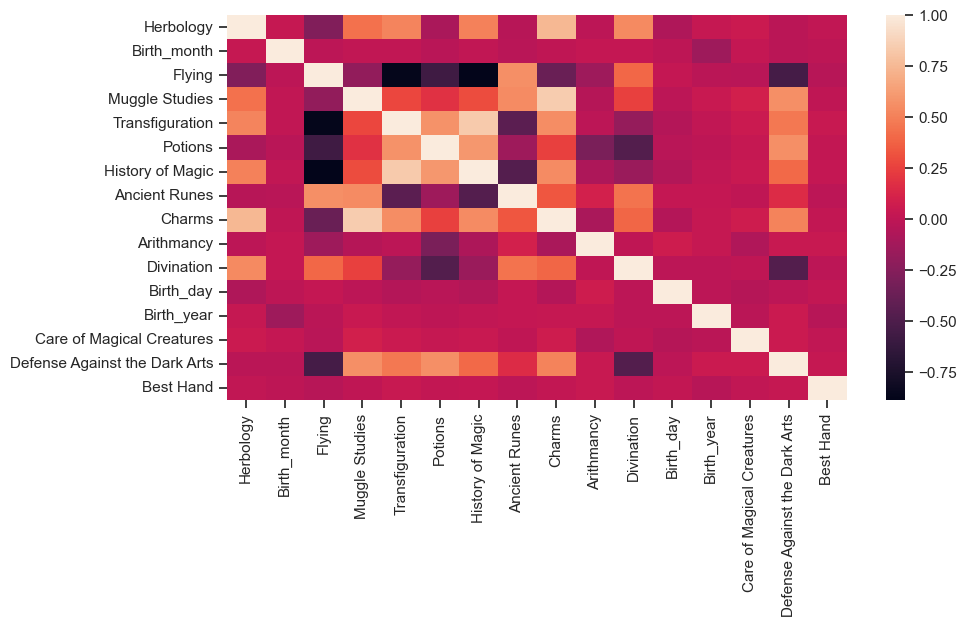

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr())

In [17]:
def df_to_numpyarray(X, y):
    # Extract input & outupts as numpy arrays
    inputs_array = X.to_numpy()
    targets_array = y.to_numpy()
    return inputs_array, targets_array

In [18]:
X_train, y_train = df_to_numpyarray(X_train, y_train)
X_test, y_test = df_to_numpyarray(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1072, 16) (1072,)
(528, 16) (528,)


In [19]:
tmp = X_test.copy()
X_test = tmp[:int(len(tmp)*0.5)]
X_val = tmp[int(len(tmp)*0.5):]

tmp = y_test.copy()
y_test = tmp.copy()[:int(len(tmp)*0.5)]
y_val = tmp.copy()[int(len(tmp)*0.5):]

X_test.shape, X_val.shape

((264, 16), (264, 16))

## Training parametes

In [20]:
# Hyperparmeters
batch_size = 64
learning_rate = 1e-3

# Other constants
input_size = 16
num_classes = 4

## Data loaders

Next, we need to create PyTorch datasets & data loaders for training & validation.

In [21]:
# convert numpy arrays to Tensors
train_inputs = torch.from_numpy(X_train).float()
train_targets = torch.from_numpy(y_train).type(torch.LongTensor)

val_inputs = torch.from_numpy(X_val).float()
val_targets = torch.from_numpy(y_val).type(torch.LongTensor)

test_inputs = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).type(torch.LongTensor)

In [22]:
train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets

(tensor([[ 0.3704,  1.6182,  0.1582,  ...,  0.4372, -1.7363,  0.0000],
         [ 0.4841, -0.7355, -0.1779,  ...,  0.4633,  1.1819,  1.0000],
         [-1.0267, -0.7355,  2.0649,  ..., -0.6410, -0.8009,  1.0000],
         ...,
         [-0.9906,  0.1471,  2.2543,  ..., -1.1839, -0.7203,  1.0000],
         [ 0.9977, -0.1471,  0.0849,  ...,  0.8483, -0.9391,  0.0000],
         [-1.3685, -1.6182, -0.9606,  ..., -0.0282,  1.2959,  1.0000]]),
 tensor([[ 0.2771, -1.3298, -0.3007,  ...,  0.0050, -0.6566,  1.0000],
         [ 0.4781,  1.2782, -0.6557,  ...,  1.0719, -0.2058,  1.0000],
         [-1.0925,  0.9884, -0.7212,  ..., -0.8057,  1.0053,  0.0000],
         ...,
         [ 0.9128,  1.2782,  0.4357,  ..., -1.8157, -1.4451,  0.0000],
         [ 0.4126,  1.2782, -0.7525,  ...,  0.1622, -0.8836,  0.0000],
         [ 0.7472,  0.4089,  0.4028,  ..., -0.6745, -0.6465,  1.0000]]),
 tensor([[-1.5378, -1.3298,  1.4244,  ...,  1.4048, -0.8644,  1.0000],
         [ 0.8455,  0.4089, -0.1776,  ...,  0

In [23]:
[s.shape for s in [train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets]]

[torch.Size([1072, 16]),
 torch.Size([264, 16]),
 torch.Size([264, 16]),
 torch.Size([1072]),
 torch.Size([264]),
 torch.Size([264])]

In [24]:
# Dataset
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)
test_dataset = TensorDataset(test_inputs, test_targets)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size*2)
test_loader = DataLoader(test_dataset, batch_size*2)

In [25]:
item, label = train_dataset[120]
print(item, label)

tensor([ 1.2128e+00,  7.3554e-01, -5.8556e-01,  3.1140e-04,  3.8875e-01,
         5.1026e-01,  1.1845e+00,  1.0304e+00,  1.5868e+00,  8.4221e-01,
         7.2260e-01,  4.7976e-02,  8.2379e-01, -7.6630e-01,  7.3246e-01,
         1.0000e+00]) tensor(2)


In [26]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[ 1.1365, -0.4413, -0.3980,  ...,  0.7968,  0.9984,  0.0000],
        [ 0.5293, -1.3240, -0.3081,  ...,  0.0173,  1.2038,  0.0000],
        [ 0.6168, -0.4413, -0.7709,  ..., -1.6441, -0.5564,  1.0000],
        ...,
        [-1.3138,  1.0298,  2.2019,  ...,  0.7239, -1.3458,  0.0000],
        [-1.5997,  0.7355, -1.3361,  ...,  0.6500,  1.0156,  0.0000],
        [ 0.9603, -0.1471, -0.2489,  ..., -1.3607, -0.5432,  1.0000]])
targets: tensor([2, 2, 1, 0, 3, 1, 0, 1, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 1, 2, 0, 2, 2, 2,
        3, 1, 3, 3, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 2,
        3, 1, 0, 0, 2, 1, 3, 2, 1, 0, 1, 3, 3, 0, 3, 1])


## Model

In [27]:
class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                  # Generate predictions
        loss = F.cross_entropy(out, targets) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                    # Generate predictions
        loss = F.cross_entropy(out, targets)   # Calculate loss
        acc = accuracy(out, targets)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [28]:
model = HousingModel()

## Training

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [30]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
evaluate(model, val_loader),\
evaluate(model, test_loader)

({'val_loss': 1.547162652015686, 'val_acc': 0.0807291641831398},
 {'val_loss': 1.656640648841858, 'val_acc': 0.1614583283662796})

In [32]:
%%time
history = fit(150, 1e-3, model, train_loader, val_loader)

Epoch [0], val_loss: 1.5128, val_acc: 0.0885
Epoch [1], val_loss: 1.4794, val_acc: 0.1068
Epoch [2], val_loss: 1.4468, val_acc: 0.1615
Epoch [3], val_loss: 1.4151, val_acc: 0.1745
Epoch [4], val_loss: 1.3842, val_acc: 0.1927
Epoch [5], val_loss: 1.3542, val_acc: 0.2188
Epoch [6], val_loss: 1.3250, val_acc: 0.2682
Epoch [7], val_loss: 1.2966, val_acc: 0.3281
Epoch [8], val_loss: 1.2690, val_acc: 0.3516
Epoch [9], val_loss: 1.2422, val_acc: 0.3594
Epoch [10], val_loss: 1.2161, val_acc: 0.3802
Epoch [11], val_loss: 1.1909, val_acc: 0.4453
Epoch [12], val_loss: 1.1663, val_acc: 0.4583
Epoch [13], val_loss: 1.1425, val_acc: 0.4740
Epoch [14], val_loss: 1.1194, val_acc: 0.5286
Epoch [15], val_loss: 1.0970, val_acc: 0.5391
Epoch [16], val_loss: 1.0753, val_acc: 0.5521
Epoch [17], val_loss: 1.0542, val_acc: 0.5703
Epoch [18], val_loss: 1.0337, val_acc: 0.5859
Epoch [19], val_loss: 1.0139, val_acc: 0.6016
Epoch [20], val_loss: 0.9946, val_acc: 0.6667
Epoch [21], val_loss: 0.9760, val_acc: 0.674

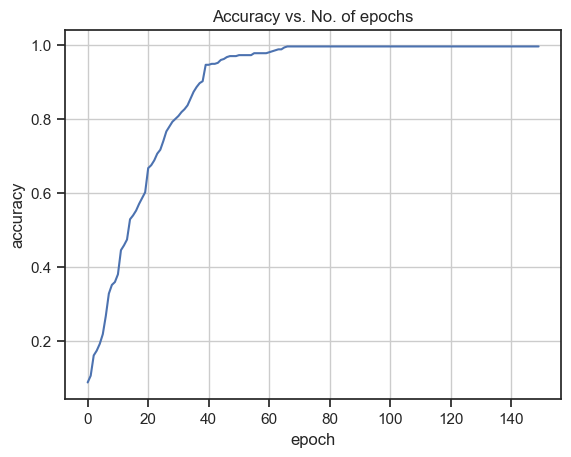

In [33]:
accuracies = [r['val_acc'] for r in history]
plt.plot(accuracies)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

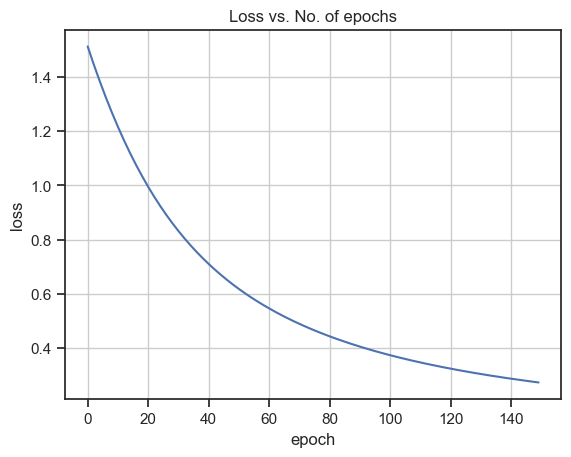

In [34]:
accuracies = [r['val_loss'] for r in history]
plt.plot(accuracies)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [35]:
# Evaluate on val dataset
result = evaluate(model, val_loader)
result

{'val_loss': 0.27238866686820984, 'val_acc': 0.9947916865348816}

In [36]:
# Evaluate on test dataset
result = evaluate(model, test_loader)
result

{'val_loss': 0.25247272849082947, 'val_acc': 0.9895833134651184}

## Prediction

In [37]:
df_train.iloc[processing_params['test_indxs'][int(len(processing_params['test_indxs'])*0.5):]][['Hogwarts House', 'First Name', 'Last Name']]

Hogwarts House First Name Last Name
1093     Hufflepuff      Terri    Spring
582      Hufflepuff      Bryce      Epps
787       Slytherin   Carmella     Brice
1214     Hufflepuff    Donnell   Hammons
128       Slytherin     Wilbur  Burnside
...             ...        ...       ...
1593      Ravenclaw    Adeline    Church
785      Hufflepuff       Asia   Bledsoe
377      Hufflepuff     Armand   Bolling
1471     Hufflepuff    Katrina    Burley
126      Hufflepuff     Amanda     Anaya

[264 rows x 3 columns]

In [38]:
testing_indexes = df_train.iloc[processing_params['test_indxs'][int(len(processing_params['test_indxs'])*0.5):]][['Hogwarts House', 'First Name', 'Last Name']].index
testing_indexes = {index:num for num, index in enumerate(testing_indexes)}
testing_indexes

{1093: 0,
 582: 1,
 787: 2,
 1214: 3,
 128: 4,
 425: 5,
 1581: 6,
 1318: 7,
 1589: 8,
 1595: 9,
 500: 10,
 1560: 11,
 522: 12,
 1436: 13,
 371: 14,
 864: 15,
 543: 16,
 909: 17,
 481: 18,
 1517: 19,
 411: 20,
 1181: 21,
 997: 22,
 231: 23,
 1366: 24,
 429: 25,
 163: 26,
 1296: 27,
 266: 28,
 1005: 29,
 873: 30,
 692: 31,
 1450: 32,
 1263: 33,
 192: 34,
 548: 35,
 63: 36,
 772: 37,
 966: 38,
 1023: 39,
 651: 40,
 1312: 41,
 858: 42,
 816: 43,
 629: 44,
 218: 45,
 1578: 46,
 286: 47,
 1288: 48,
 1174: 49,
 589: 50,
 1074: 51,
 1315: 52,
 383: 53,
 1273: 54,
 700: 55,
 1532: 56,
 628: 57,
 693: 58,
 705: 59,
 497: 60,
 1168: 61,
 490: 62,
 1524: 63,
 706: 64,
 774: 65,
 1255: 66,
 979: 67,
 1299: 68,
 277: 69,
 1240: 70,
 949: 71,
 793: 72,
 236: 73,
 670: 74,
 1333: 75,
 1541: 76,
 1271: 77,
 1105: 78,
 208: 79,
 1149: 80,
 1356: 81,
 450: 82,
 58: 83,
 495: 84,
 1204: 85,
 1529: 86,
 1311: 87,
 1433: 88,
 649: 89,
 809: 90,
 1287: 91,
 427: 92,
 1189: 93,
 292: 94,
 552: 95,
 1228: 96,


In [39]:
def get_prediction(dataset, model, index, mapping):
    input, target = dataset[index]
    predict_single(input, target, model, mapping)

def predict_single(input, target, model, mapping):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    _, predictions  = torch.max(predictions, dim=1)
    prediction = predictions[0].detach()
    print("Target:", mapping[target.item()])
    print("Prediction:", mapping[prediction.item()])

Testing on 10 random items from the test dataset

In [40]:
import random

for id_ in [random.choice(list(testing_indexes.keys())) for _ in range(10)]:
    get_prediction(test_dataset, model, testing_indexes[id_], processing_params['map_dict'][1])
    print('---')

Target: Hufflepuff
Prediction: Hufflepuff
---
Target: Ravenclaw
Prediction: Ravenclaw
---
Target: Ravenclaw
Prediction: Ravenclaw
---
Target: Ravenclaw
Prediction: Ravenclaw
---
Target: Ravenclaw
Prediction: Ravenclaw
---
Target: Hufflepuff
Prediction: Hufflepuff
---
Target: Gryffindor
Prediction: Gryffindor
---
Target: Hufflepuff
Prediction: Hufflepuff
---
Target: Slytherin
Prediction: Slytherin
---
Target: Ravenclaw
Prediction: Ravenclaw
---
